In [110]:
#Clustering algorithms with python
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
## K means
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
## other models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


### K-Means Clustering

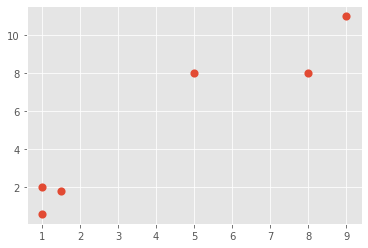

In [6]:
# EXAMPLE
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


plt.scatter(X[:, 0],X[:, 1], s=10, linewidths = 5, zorder = 10)
plt.show()

In [9]:
clf = KMeans(n_clusters=2)
clf.fit(X)
centroids = clf.cluster_centers_
labels = clf.labels_

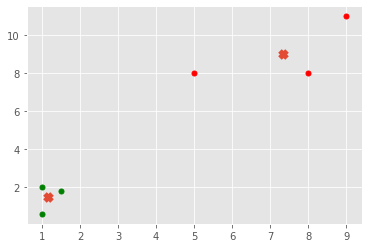

In [19]:
## Plot the clusters and show the calculated centroids
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=50, linewidths = 5, zorder = 10)
plt.show()

## Hierarchical Clustering


# Clustering Algorigthms on Titanic Data

In [73]:
## 'Real' Data Example: Titanic
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv") ##from github
titanic.columns = titanic.columns.str.lower()
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
## aggregate 'cabin' into larger groups
titanic['cab'] = titanic['cabin'].str.replace('[^a-zA-Z]', '').fillna('miss') ##drop the nums from the cabin string, also fill the NaN category
## Dummy the categoricals
titanic = pd.get_dummies(titanic, columns = ['sex', 'cab', 'embarked'])
## Drop unwanted cols
titanic = titanic.drop(labels=['name','sex_male', 'cabin','ticket'],axis=1)

C:\Users\hanse\AppData\Local\Temp\ipykernel_2720\831223122.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic['cab'] = titanic['cabin'].str.replace('[^a-zA-Z]', '').fillna('miss') ##drop the nums from the cabin string, also fill the NaN category


In [76]:
# need to impute missing age values
titanic['age'].isna().sum()
titanic_cols = titanic.columns
titanic_cols

Index(['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'sex_female', 'cab_A', 'cab_B', 'cab_BB', 'cab_BBB', 'cab_BBBB',
       'cab_C', 'cab_CC', 'cab_CCC', 'cab_D', 'cab_DD', 'cab_E', 'cab_F',
       'cab_FE', 'cab_FG', 'cab_G', 'cab_T', 'cab_miss', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')

In [77]:
## impute missings with KNN (k=5)
imputer = KNNImputer(n_neighbors=5, weights='uniform') ##from sklearn
titanic = imputer.fit_transform(titanic)
## convert the imputers output back into pd.DF 
titanic = pd.DataFrame(titanic)
titanic.columns = titanic_cols ##provide correct cols

## Titanic: K-Means

In [94]:
## Prepare X, y data for model
X = np.array(titanic.drop(labels='survived',axis=1)).astype(float)
X = preprocessing.scale(X) ##scale features - important for kmeans clustering 

y = np.array(titanic['survived'])

kmeans_clf = KMeans(n_clusters=2) ##2 clusters: survived, or didn't survive
kmeans_clf.fit(X)

## Accuracy - not great, better than random guessing.
sum(kmeans_clf.predict(X) == titanic.survived) / len(titanic.survived)

0.6924803591470258

## Comparison to supervised learning models

Let's compare this to a supervised learning model - after all, we have labels

In [124]:
## Random Forest (w/ cross validation)
rf_mod = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=10,max_features=3)
cv_folds = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=123)
cv_scores = cross_val_score(rf_mod, X, y, scoring='accuracy', cv=cv_folds, n_jobs=-1)

## Accuracy
print("Mean CV Accuracy: ", np.mean(cv_scores))

## no cv
rf_mod.fit(X, y,)
y_pred = rf_mod.predict(X)

print("Training Accuracy: ", metrics.accuracy_score(y, y_pred))
#rf_mod.scores() ##also works

Mean CV Accuracy:  0.8148159772351599
Training Accuracy:  0.9147025813692481


In [123]:
## Gradient Boosted Ensemble
gb_mod = GradientBoostingClassifier(loss='log_loss', learning_rate=0.01, n_estimators=5000)
gb_mod.fit(X, y)
y_pred = gb_mod.predict(X)

print("Training Accuracy: ", metrics.accuracy_score(y, y_pred))

Training Accuracy:  0.9831649831649831
